# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

Pu Zheng: updated this example to match version for 2018.12.20

# Imports

In [2]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, classes, alignment_tools, analysis
print(os.getpid())

37444


In [3]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.External)
reload(ia.External.Fitting_v3)
reload(ia.alignment_tools)

<module 'ImageAnalysis3.alignment_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\alignment_tools.py'>

# Create Cell_Data object

## create cell_data class and load basic info

In [27]:
fov_id = 0
cell_id = 0
# specify initialization parameters:
param = {'data_folder':r'Y:\20190305_IMR90_CTP05_DNA-FISH',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'I:\Pu_temp\DNA_unique',
         'num_threads': 20,
         'correction_folder':r'I:\Corrections',
         }
# initialize cell_data class:
dna = ia.classes.Cell_Data(param)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 224
- Number of field of views: 60
- Importing csv file: Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 218 folders are found according to color-usage annotation.


## Load more info for cell

In [28]:
# load existing cell_info, dont run for the first time
dna._load_from_file('cell_info')
# load segmentation/
dna._load_segmentation(_force=False);
# load drift info
drift = dna._load_drift(_size=360, _coord_sel=[500,500], _dynamic=True, _num_threads=20,_sequential_mode=False,_force=False)

- drift already exists for cell:0, skip


### test drift

- Start correcting H137R137\Conv_zscan_36.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Start correcting H138R138\Conv_zscan_36.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Start correcting H139R139\Conv_zscan_36.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Start correcting H140R140\Conv_zscan_36.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Start correcting H141R141\Conv_zscan_36.dax for channel:488
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488


<IPython.core.display.Javascript object>


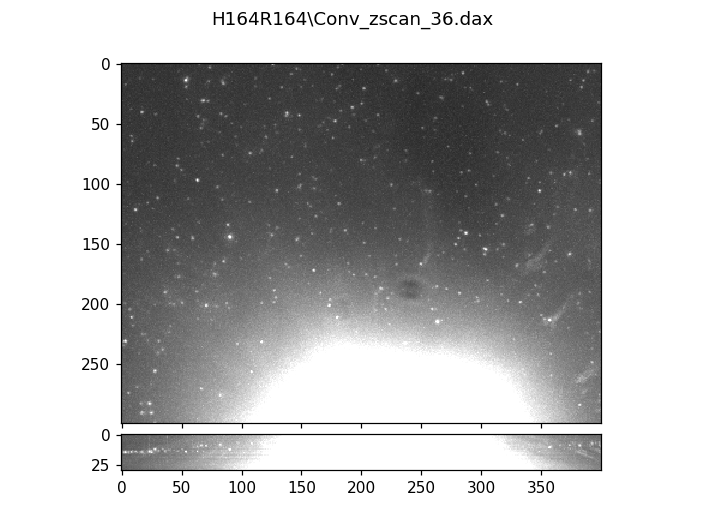

In [9]:
%matplotlib notebook
# check drift
crop = np.array([[0,30],[500,800],[500,900]])
data_folder = dna.data_folder[0]
test_ims = [corrections.correct_single_image(os.path.join(data_folder, _hyb_name),
                                              488, crop_limits=crop, drift=_dft, verbose=True)
                                              for _hyb_name, _dft in list(dna.drift.items())[0:25]]
%matplotlib notebook
#lst.cells[2]._load_from_file('unique')
#visual_tools.imshow_mark_3d_v2(lst.cells[2].unique_ims)
visual_tools.imshow_mark_3d_v2(test_ims, image_names=list(dna.drift)[0:25])

In [28]:
dft_file = os.path.join(dna.drift_folder, dna.fovs[dna.fov_id].replace('.dax', '_current_cor.pkl'))
saved_dft = pickle.load(open(dft_file, 'rb'))
new_dft = {}
for _hyb_fd, _info in saved_dft.items():
    if _info[-1] < -100:
#    if 'H150' in _hyb_fd or 'H161' in _hyb_fd:
        continue
    else:
        new_dft[_hyb_fd] = _info
pickle.dump(new_dft, open(dft_file, 'wb'))

# Load and crop images from raw data

In [20]:
unique_ims, unique_ids, unique_channels = dna._crop_images('unique',_load_in_ram=True, _corr_bleed=True, 
                                                           _overwrite=False)

- Start cropping unique image
- all channels in hyb:H0R0\Conv_zscan_00.dax already exists in unique_ims, skip!
-- start cropping unique for fov:0, cell:0 with 20 threads
-- lengths: 651 651 651
-- time spent in cropping:6005.1416256427765
- saving unique to file: I:\Pu_temp\DNA_unique\fov-0\cell-0\unique_rounds.npz with 651 images
-- time spent in saving:488.7812910079956
- saving cell_info to: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_ids', 'unique_channels']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl


## Save to file 

In [7]:
#dna._save_to_file('all') # save all

dna._save_to_file('cell_info') # save all cell_info exclude images
#dna._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#dna._save_to_file('unique') # save unique info into unique_rounds.npz

#dna._save_to_file('combo') # save combo_groups into Harry's format

- saving cell_info to: I:\Pu_temp\DNA_unique\fov-36\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fovs', 'map_folder', 'num_threads', 'save_folder', 'segmentation_crop', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'unique_channels', 'unique_ids', 'use_dapi']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-36\cell-20\cell_info.pkl


In [122]:
# calculate channel specific background (not used for now)
dna._calculate_background(_verbose=True)

-- calculating background for ['750', '647', '561']


{'750': 606.5, '647': 1630.0, '561': 1649.5}

# Generate and Pick chromosome

## generate and identify chromosome

<IPython.core.display.Javascript object>


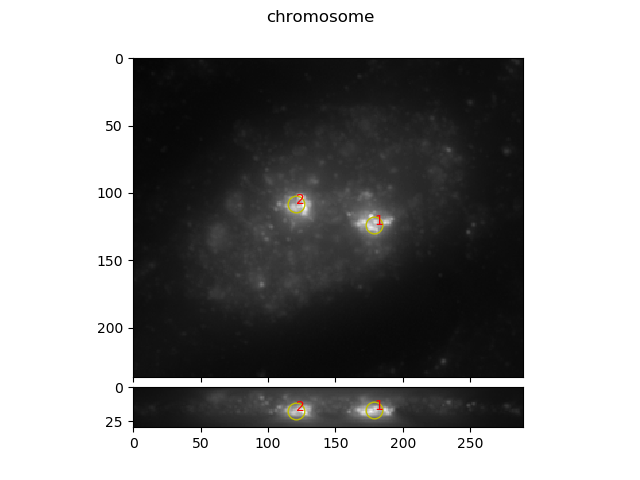

In [38]:
%matplotlib notebook
# generate
dna._generate_chromosome_image('unique', _max_count=90, _verbose=True)
# identify
dna._identify_chromosomes();
# manually pick for only this cell
dna._pick_chromosome_manual()
# then do manual picking and close the matplotlib notebook inferface.

## Update chromosome coordinate info

In [39]:
dna._update_chromosome_from_file();

-- 2 loaded
- saving cell_info to: I:\Pu_temp\DNA_unique\fov-0\cell-1\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-0\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coord']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-0\cell-1\cell_info.pkl


# Fitting and picking spots for unique images

## Load unique images

In [24]:
# unique
dna._load_from_file('unique', _overwrite=False)

- Loading unique from file: I:\Pu_temp\DNA_unique\fov-22\cell-2\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 19

## multi-fitting

In [8]:
cand_spots = dna._multi_fitting_for_chromosome(_type='unique', _num_threads=20, _normalization=True,
                                             _max_seed_count=10, _min_seed_count=3, _th_to_end=1e-7, _save=True)

+ Start multi-fitting for unique images
++ no unique image info loaded to this cell, try loading:
- Loading unique from file: I:\Pu_temp\DNA_unique\fov-22\cell-2\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,

## dynamic picking spots

In [46]:
dynamic_picked_pts = dna._dynamic_picking_spots('unique', _w_int=1, _w_dist=2, _w_center=0)

+ Pick unique spots for by brightness in fov:0, cell:0
- saving cell_info to: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl


-- generate unique dist-map for fov:0, cell:0, chrom:0
-- generate unique dist-map for fov:0, cell:0, chrom:1
- saving cell_info to: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['_unique_distance_map']
- Writing cell data to file: I:\Pu_temp\DNA_unique\fov-0\cell-0\cell_info.pkl


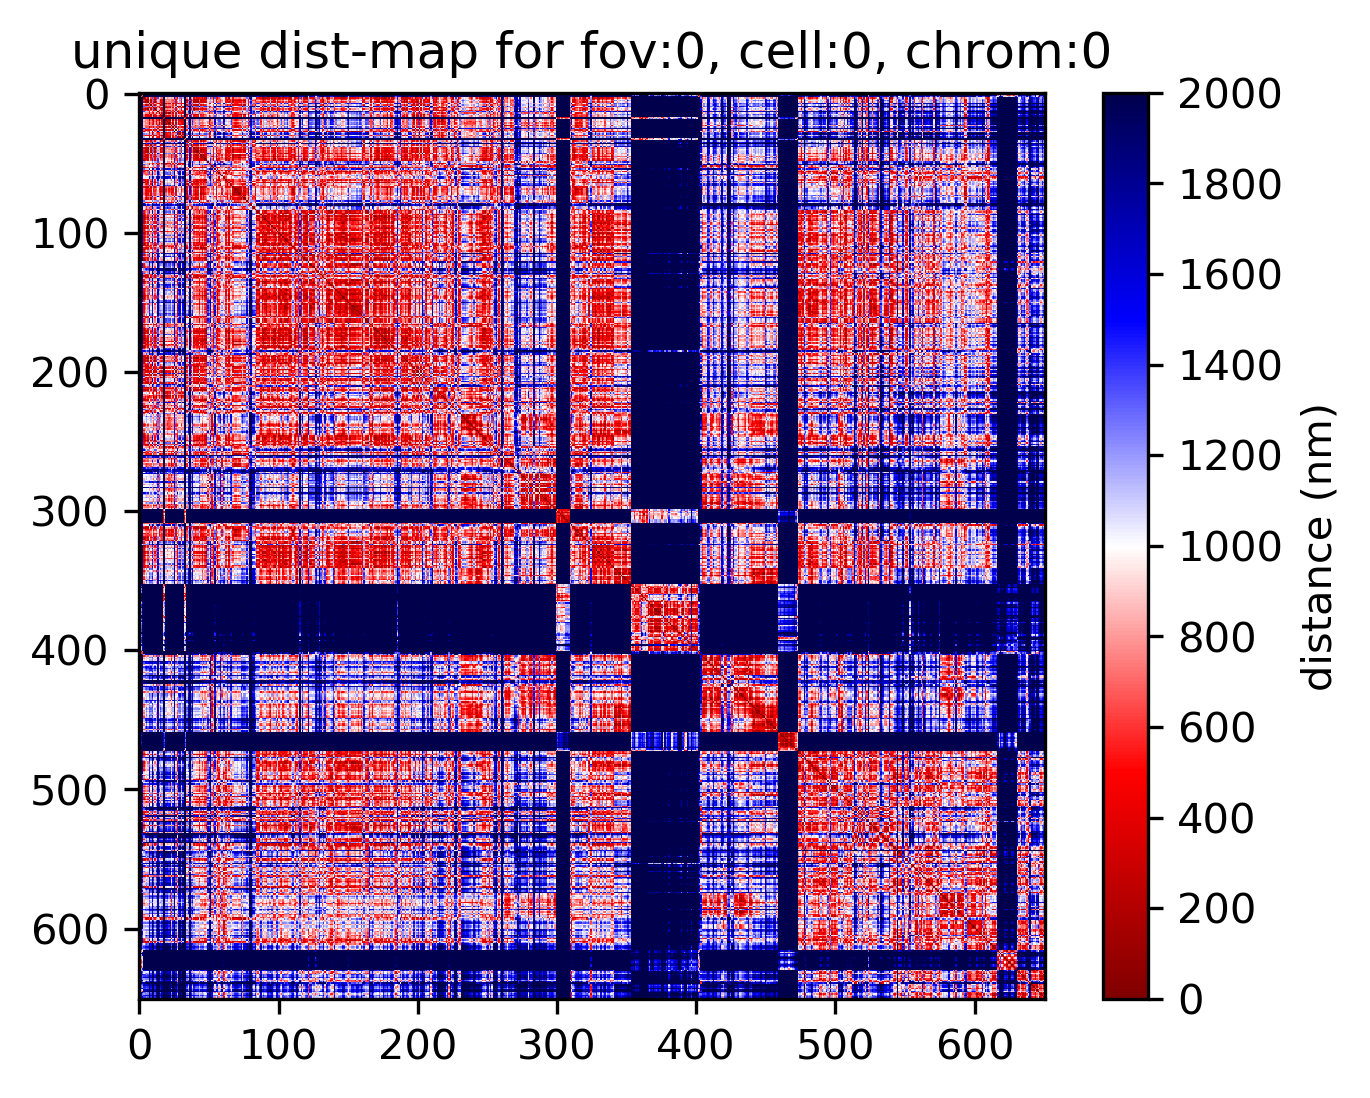

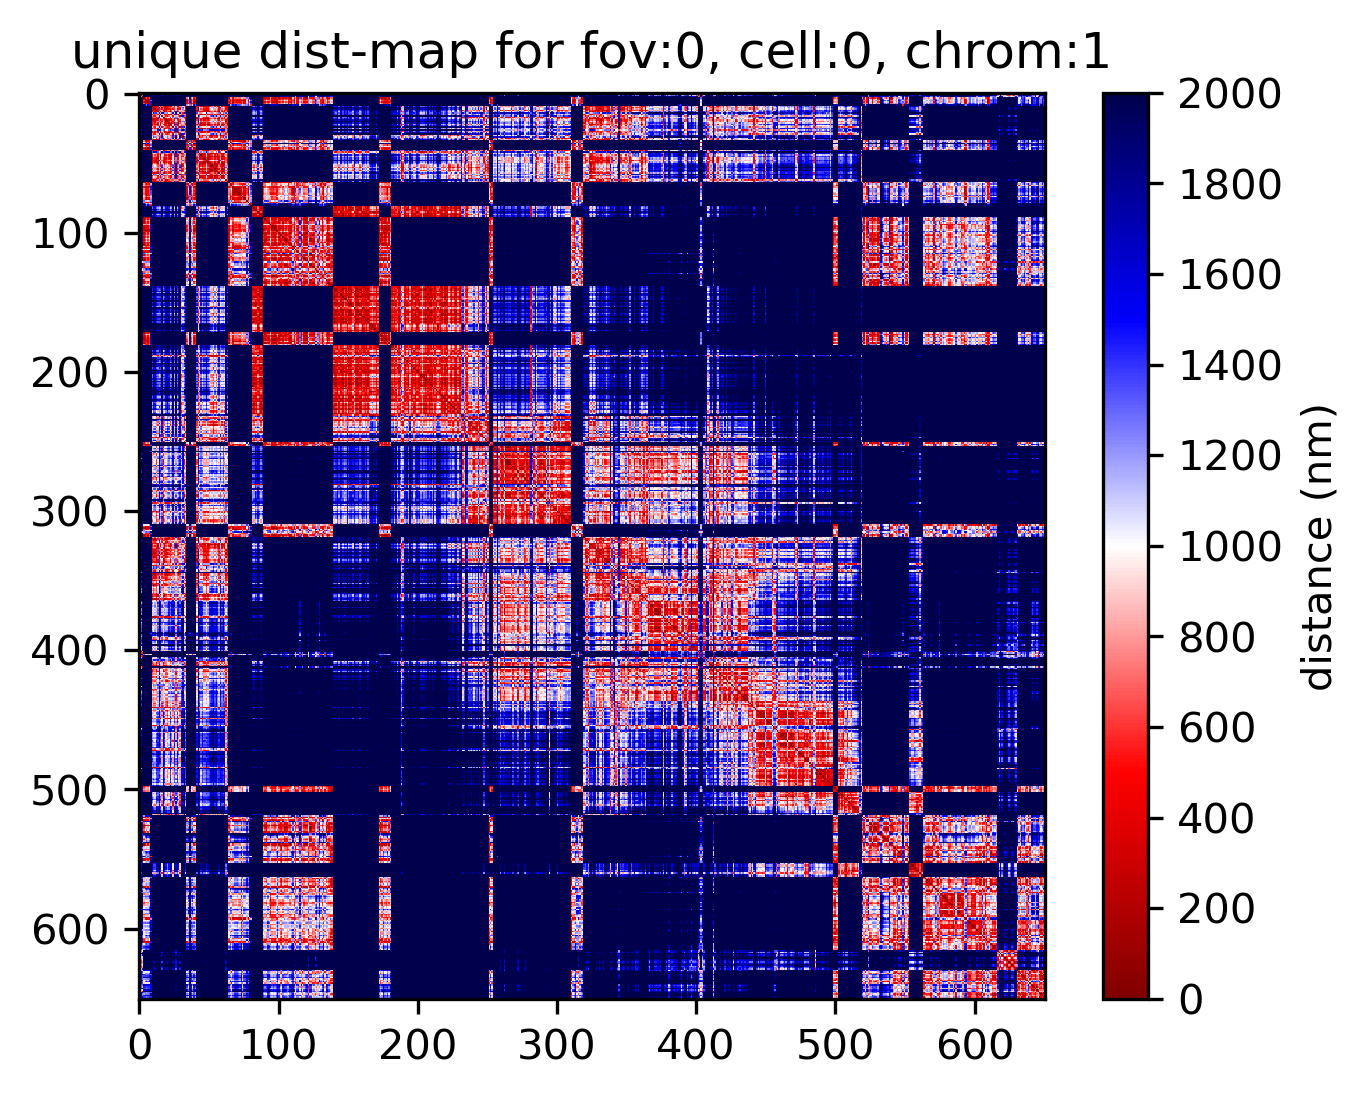

In [47]:
%matplotlib inline
distmaps = dna._generate_distance_map('unique', '', _limits=[0,2000], _overwrite=True)

## EM pick spots

In [18]:
%matplotlib inline 
EM_picked_points = dna._pick_spots('unique', 'EM', _w_ccdist=1, _w_lcdist=0.1, _w_int=1, _w_nbdist=3,
                                   _save_inter_plot=False, _save_to_info=False, _overwrite=True)

- Start EM picking unique spots, fov:22, cell:2.
- EM picking spots for 651 regions.
-- filtering spots by intensity threshold = 1.
-- initialize EM by naively picking spots!
-- EM iter:0
--- E time: 0.0691 s,
--- M time: 3.7768 s.
--- change_ratio: 0.565284178187404
-- EM iter:1
--- E time: 0.0921 s,
--- M time: 3.6347 s.
--- change_ratio: 0.19047619047619047
-- EM iter:2
--- E time: 0.0921 s,
--- M time: 3.7328 s.
--- change_ratio: 0.059907834101382486
-- EM iter:3
--- E time: 0.05 s,
--- M time: 2.2517 s.
--- change_ratio: 0.006144393241167435
-- EM iter:4
--- E time: 0.063 s,
--- M time: 2.1876 s.
--- change_ratio: 0.0
- EM picking spots for 651 regions.
-- filtering spots by intensity threshold = 1.
-- initialize EM by naively picking spots!
-- EM iter:0
--- E time: 0.1171 s,
--- M time: 3.0823 s.
--- change_ratio: 0.5867895545314901
-- EM iter:1
--- E time: 0.058 s,
--- M time: 2.2357 s.
--- change_ratio: 0.2227342549923195
-- EM iter:2
--- E time: 0.045 s,
--- M time: 2.2076 s.


-- generate unique dist-map for fov:22, cell:2, chrom:0
-- generate unique dist-map for fov:22, cell:2, chrom:1


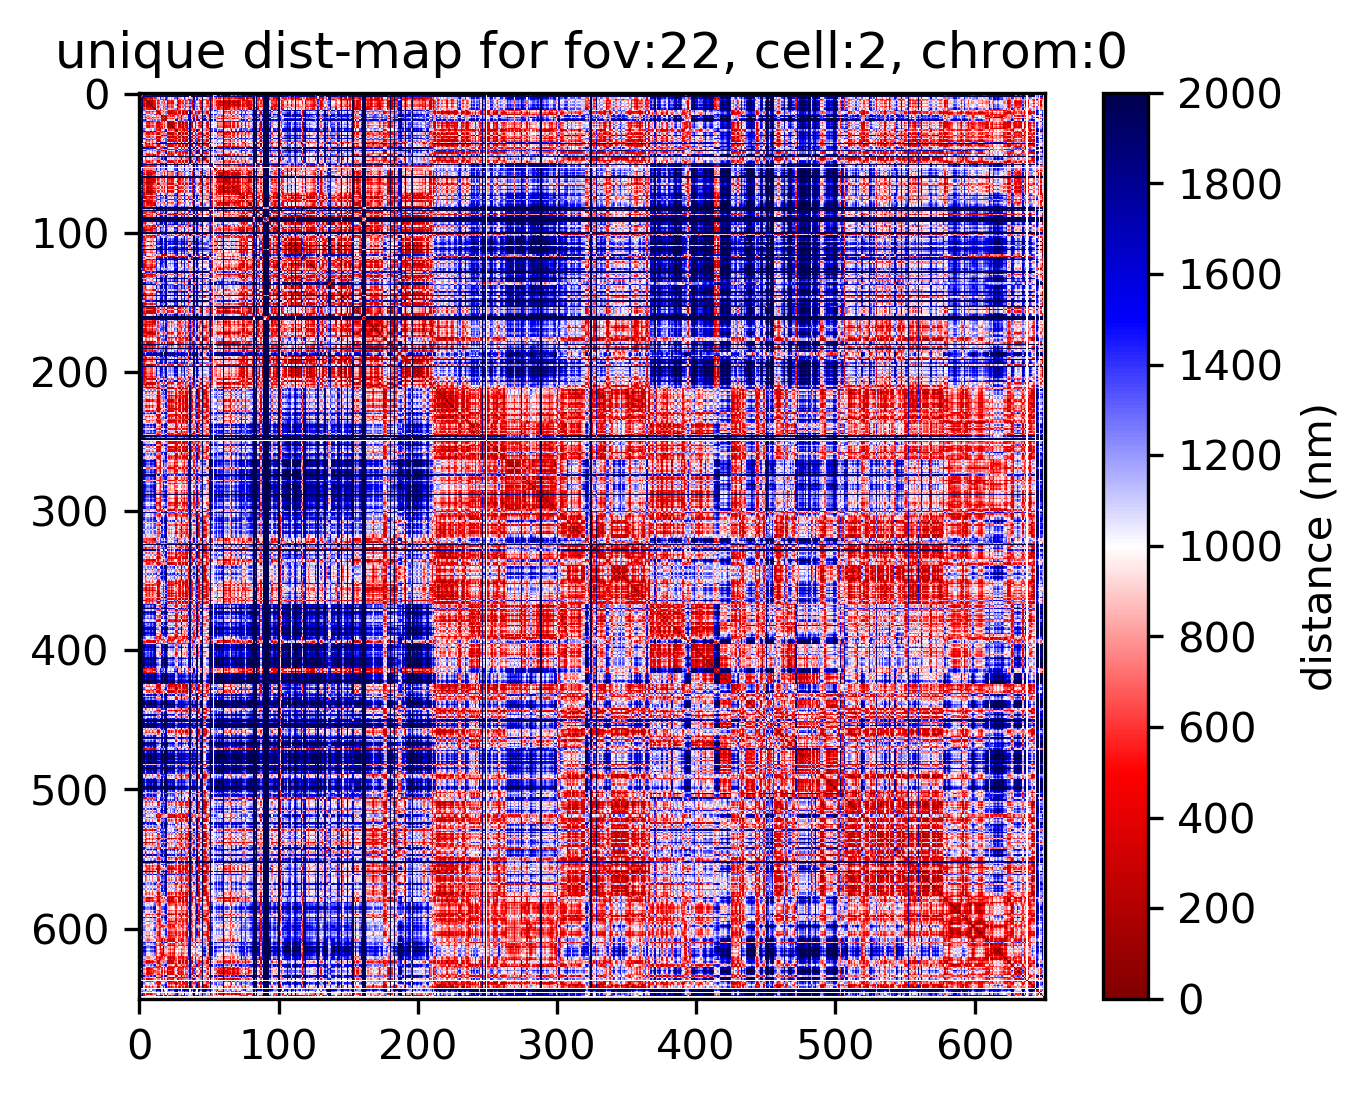

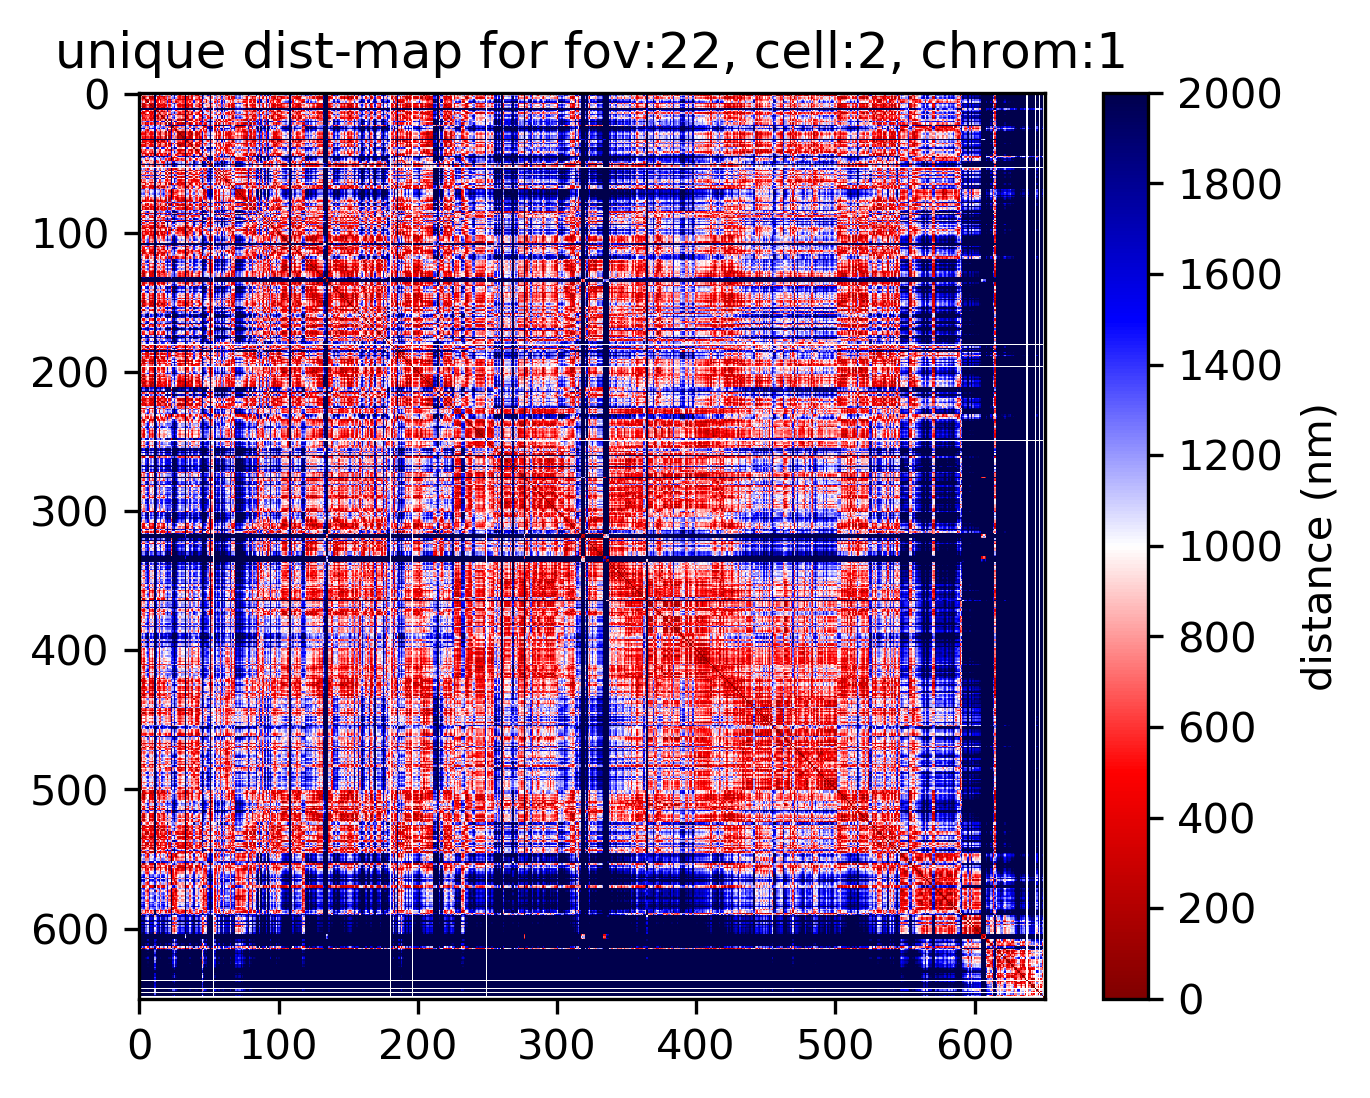

In [19]:
%matplotlib inline
distmaps = dna._generate_distance_map('unique','EM',_limits=[0,2000], _overwrite=True, 
                                      _save_info=False, _save_plot=False)

# compare with RNA

In [55]:
# specify initialization parameters:

param = {'data_folder':r'Y:\20190302_IMR90_CTP05_intronFISH',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'\\chem-zhuanglab\SSD_01\20190302_intronicRNA_unique',
         'num_threads': 18,
         'correction_folder':r'I:\Corrections',
         };
# initialize cell_data class:
rna = ia.classes.Cell_Data(param)
# load existing cell_info, dont run for the first time
rna._load_from_file('cell_info')
# load segmentation
rna_seg, rna_seg_crop = rna._load_segmentation(_force=False)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 60
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 33 folders are found according to color-usage annotation.


In [55]:
scores = analysis.spot_score_in_chromosome(dna.EM_picked_unique_spots[0], np.arange(651), dna.EM_picked_unique_spots[0])

(array([   3.,    1.,    1.,    2.,    2.,   10.,   28.,   94.,  243.,  267.]),
 array([-19.42629103, -17.50998923, -15.59368743, -13.67738563,
        -11.76108383,  -9.84478203,  -7.92848023,  -6.01217843,
         -4.09587663,  -2.17957483,  -0.26327303]),
 <a list of 10 Patch objects>)

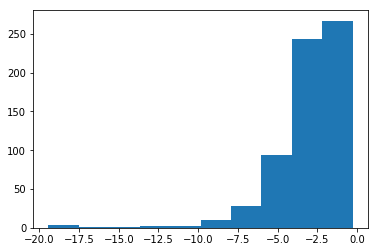

In [56]:
plt.figure()
plt.hist(scores)

In [70]:
sum(np.array(dna.picked_unique_spots[0])[:,0]<1.5)

39

(array([  3.,   0.,   0.,   0.,  39.,  29.,  25.,  28.,  21.,  31.,  30.,
         16.,  24.,  17.,   9.,  15.,  11.,   7.,  20.,   6.,  15.,  12.,
          9.,   6.,  11.,   5.,  11.,   8.,   7.,   3.,   4.,   7.,   6.,
          6.,   9.,   3.,   5.,   6.,  12.,   4.]),
 array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
          2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
          4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
          6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
          8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,  10.  ]),
 <a list of 40 Patch objects>)

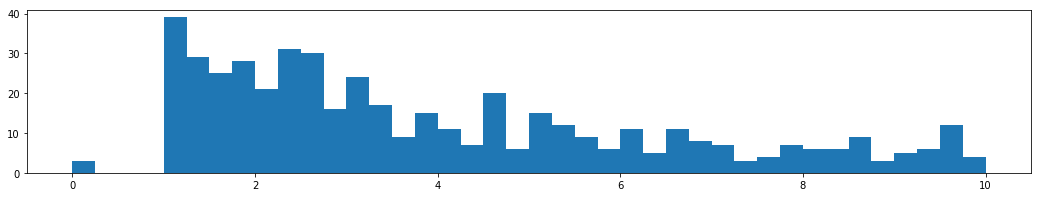

In [66]:
plt.figure(figsize=(18,3))
plt.hist(dna.EM_picked_unique_spots[0][:,0], 40, range=(0,10))


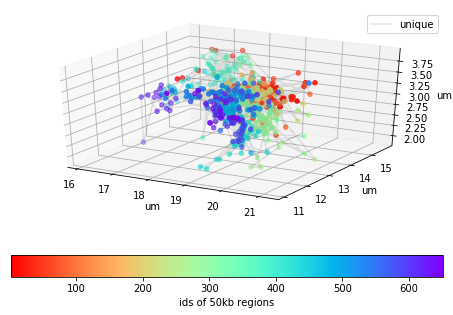

In [49]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(dynamic_picked_pts[0])[:,1:4]*dna.distance_zxy/1000
#dd_pts = np.array(dynamic_decoded_pts[0])[:,1:4][277:325]*dna.distance_zxy

du_pts = du_pts
#dd_pts = dd_pts[30:]
sc = ax.scatter3D(du_pts[:,1], du_pts[:,2],du_pts[:,0], c=np.array(dna.unique_ids), cmap='rainbow_r')
ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.1, color='black')
#ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()
plt.xlabel('um')
plt.ylabel('um')
ax.set_zlabel('um')
cb = plt.colorbar(sc,ticks=np.arange(0,651,100),orientation="horizontal")
cb.set_label('ids of 50kb regions')


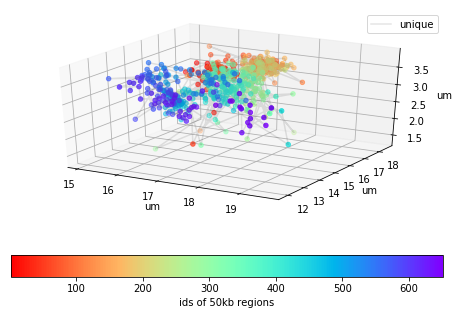

In [51]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(dna.EM_picked_unique_spots[1])[:,1:4]*dna.distance_zxy/1000
#dd_pts = np.array(dynamic_decoded_pts[0])[:,1:4][277:325]*dna.distance_zxy

du_pts = du_pts
#dd_pts = dd_pts[30:]
sc = ax.scatter3D(du_pts[:,1], du_pts[:,2],du_pts[:,0], c=np.array(dna.unique_ids), cmap='rainbow_r')
ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.1, color='black')
#ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()
plt.xlabel('um')
plt.ylabel('um')
ax.set_zlabel('um')
cb = plt.colorbar(sc,ticks=np.arange(0,651,100),orientation="horizontal")
cb.set_label('ids of 50kb regions')

In [48]:
zxy= _distance_zxy * np.array(dna.picked_unique_spots[0])[:, 1:4]

In [74]:
chr_center = np.nanmean(zxy, axis=0)

In [75]:
dist_2_ct = np.linalg.norm(zxy - chr_center, axis=1 )

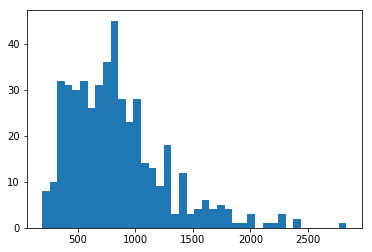

In [78]:
%matplotlib inline
plt.figure()
plt.hist(dist_2_ct, 40)
plt.show()

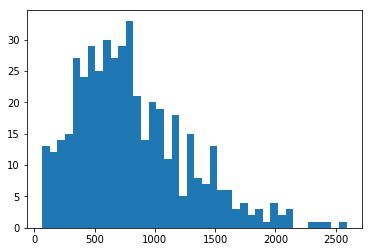

In [79]:
%matplotlib inline
plt.figure()
plt.hist(ndist, 40)
plt.show()

In [66]:
scipy.histogram(ndist, bins=20)

(array([25, 29, 51, 54, 57, 62, 35, 39, 29, 20, 15, 19,  9,  6,  4,  6,  3,
         1,  2,  1], dtype=int64),
 array([  64.87249026,  191.18019676,  317.48790326,  443.79560976,
         570.10331625,  696.41102275,  822.71872925,  949.02643575,
        1075.33414225, 1201.64184875, 1327.94955525, 1454.25726175,
        1580.56496825, 1706.87267474, 1833.18038124, 1959.48808774,
        2085.79579424, 2212.10350074, 2338.41120724, 2464.71891374,
        2591.02662024]))

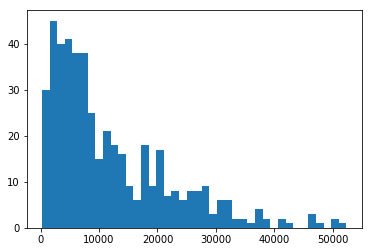

In [81]:
%matplotlib inline
plt.figure()
plt.hist(np.array(a.picked_unique_spots[0])[:, 0], 40)
plt.show()

In [59]:
ndist = [np.linalg.norm(zxy[_i+1]-zxy[_i]) for _i in range(len(zxy)-1)]

In [44]:
from ImageAnalysis3 import _distance_zxy

In [83]:
from scipy.stats import cumfreq

sample = np.random.uniform(0, 1, 50)
ecdf = sm.tools.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)

NameError: name 'sm' is not defined

In [86]:
def EM_Pick_Spots():
    """Pick spots """
    
    


In [88]:
cumulative_probability(ndist, 1900)

0.9721627408993576

In [133]:
naive_spots =analysis.naive_pick_spots(a.unique_spots, a.unique_ids, chrom_id=0)
spot_score_in_chromosome(naive_spots[0], naive_spots, a.unique_spots)

[ 3306.10441836 11354.40571451 14573.23883467] [ 3186.25202179 12081.05950928 14132.79904175]


In [130]:
naive_spots[:,1:4]

array([[ 15.93126 , 113.97226 , 133.3283  ],
       [ 17.900421, 118.5849  , 140.32819 ],
       [ 18.944202, 135.84302 , 131.06496 ],
       ...,
       [ 15.079756, 130.38164 , 153.89598 ],
       [ 14.399226,  97.102356, 136.63625 ],
       [ 13.997748, 110.91284 , 136.96155 ]], dtype=float32)

In [141]:
test = np.arange(1,4)

In [147]:
np.delete(test, 1)

array([1, 3])

In [280]:
for _pt, _spot_list in zip(naive_spots, a.unique_spots):
    _spots =list( _spot_list[0])
    _match = [1-(_sp-_pt).all() for _sp in _spots]
    print(np.where(_match))

(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([3], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([2], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([1], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([5], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([1], dtype=int64),)
(array([1], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([1], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([1], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(

In [278]:
np.all([0,1,2])

False

In [342]:
def spot_score_in_chromosome(spots, reg_id, sel_spots, cand_spots, distance_zxy=_distance_zxy, local_size=5,
                             w_ctdist=1, w_lcdist=1, w_int=1):
    """Function to calculate log-score for given spot in selected chr_pts from candidiate_points
    Inputs:
        spots: given fitted spots info, list of spots or one spot
        reg_id: region id for these given spots, int
        sel_spots: currently selected spots for chromosome tracing, list of spots / 2darray
        cand_spots: candidate spots, list of list of spots
        distance_zxy: transform from pixel to nm for z,x,y axes
        local_size: window size to calculate local distance, int (default: 5)
        w_ctdist: weight for distance to chr-center, float (default: 1)
        w_lcdist: weight for distance to local-center, float (default: 1)
        w_int: weight for intensity, float (default: 1)
    Output:
        _log_score: log score for this given spot, float 
    """
    # accumulative prob.
    def _cum_prob(data, target_value):
        """Function to calculate CDF from a dataset"""
        data = np.array(data, dtype=np.float)
        target_value = np.array(target_value, dtype=np.float)
        if len(target_value.shape) == 0:
            target_value = np.array([target_value], dtype=np.float)
        target_value[np.isnan(target_value)] = np.inf

        cprob = np.array(
            [np.nansum(data < _v) / np.nansum(1-np.isnan(data)) for _v in target_value])
        cprob[cprob == 0] = 1 / np.nansum(1-np.isnan(data))
        cprob[cprob == 1] = 1 - 1 / np.nansum(1-np.isnan(data))
        return cprob

    def _local_distance(spot_zxy, zxy, pt_id, size=local_size):
        """Function to caluclate local distance"""
        _half_size = int((size-1)/2)
        if pt_id < _half_size:
            _half_size = pt_id
        elif pt_id >= len(zxy) - _half_size:
            _half_size = len(zxy) - pt_id - 1
        if _half_size == 0:
            return 0.5
        _ind = np.delete(np.arange(pt_id-_half_size,
                                   pt_id+_half_size+1), _half_size)
        _local_mean = np.nanmean(zxy[_ind], axis=0)
        _local_dist = np.linalg.norm(_local_mean - spot_zxy, axis=1)
        return _local_dist

    # get chr coordinates
    _zxy = np.array(sel_spots)[:, 1:4]*np.array(distance_zxy)[np.newaxis, :]
    _chr_center = np.nanmean(_zxy, axis=0)
    if isinstance(cand_spots[0], list):
        _all_spots = np.concatenate(
            [np.concatenate(__pts) for __pts in cand_spots])  # all candidate spots
    elif isinstance(cand_spots, np.ndarray):
        _all_spots = np.array(cand_spots)
    else:
        _all_spots = np.concatenate(cand_spots)
    _cand_zxy = np.array(_all_spots)[:, 1:4] * \
        np.array(distance_zxy)[np.newaxis, :]
    # get pt coordinates
    _pts = np.array(spots)
    if len(np.shape(_pts)) == 1:
        _pts = _pts[np.newaxis, :]
    _pt_zxy = _pts[:, 1:4] * np.array(distance_zxy)[np.newaxis, :]
    if isinstance(reg_id, int):
        _rids = reg_id * np.ones(len(_pt_zxy), dtype=np.int)
    elif isinstance(reg_id, np.ndarray) and len(reg_id)==1:
        _rids = reg_id[0] * np.ones(len(_pt_zxy), dtype=np.int)
    elif len(reg_id) == len(_pt_zxy):
        _rids = np.array(reg_id, dtype=np.int)

    # get chr statistics
    _ct_dists = np.linalg.norm(_cand_zxy - _chr_center, axis=1)
    _lc_dists = np.array(
        [_local_distance(_zxy[np.newaxis, _i], _zxy, _i) for _i in range(len(_zxy))])
    _intensities = np.array(_all_spots)[:, 0]
    # get pt statistics
    _pt_ct_dist = np.linalg.norm(_pt_zxy - _chr_center, axis=1)
    _pt_lc_dist = [_local_distance(_p[np.newaxis,:], _zxy, _rid) for _p,_rid in zip(_pt_zxy, _rids)]
    _pt_intensity = _pts[:, 0]
    # get score
    _log_score = np.log(1-_cum_prob(_ct_dists, _pt_ct_dist))*w_ctdist \
        + np.log(1-_cum_prob(_lc_dists, _pt_lc_dist))*w_lcdist \
        + np.log(_cum_prob(_intensities, _pt_intensity))*w_int
 
    return _log_score
    
spot_score_in_chromosome(a.unique_spots[4][0][0:2], [4,4], naive_spots, a.unique_spots)

array([-3.08679114, -3.63016715])

In [353]:
%%timeit
spot_score_in_chromosome(a.unique_spots[4][0][0:], 4*np.ones(10,dtype=int), naive_spots, a.unique_spots, w_int=2)

43.5 ms ± 17.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [352]:
len(a.unique_spots[4][0][0:])

10

In [232]:
all_spots = np.concatenate([np.concatenate(pts) for pts in a.unique_spots])

In [321]:
scores = []
for rid, pt_list in enumerate(a.unique_spots):
    pts = pt_list[0]
    local_scores = analysis.spot_score_in_chromosome(pts, rid, naive_spots, a.unique_spots)
    print(len(pts), local_scores)
    #break

10 [-0.23718588 -0.32031854 -0.97312127 -1.28300388 -1.73119727 -1.22875495
 -1.3872612  -1.62648461 -1.62958411 -1.63059236]
5 [-1.24305519 -0.75303974 -3.09888798 -3.54574651 -3.96751485]
10 [-1.22485194 -2.84541943 -1.57040345 -4.45967008 -1.57482164 -4.32767566
 -7.1585025  -4.48285557 -6.56426444 -6.06320041]
10 [-1.92050208 -3.93357138 -3.04298396 -2.8156665  -4.78909628 -5.97690263
 -1.84086416 -3.78399692 -4.99407066 -4.26027714]
10 [ -3.08679114  -3.63016715  -6.70468618  -4.5250433   -6.5612132
  -6.27560326  -6.65434798  -7.37444987  -3.37374383 -10.5645442 ]
10 [-5.05666193 -0.73788446 -3.73908029 -2.11480522 -2.16499967 -5.55236324
 -5.16652228 -4.91360818 -4.29520405 -4.77582241]
10 [-1.35779789 -1.28772067 -6.92031441 -5.88567647 -5.67146651 -7.21604179
 -6.32373146 -7.38024761 -5.27261899 -5.46905288]
10 [-1.12611504 -1.54126642 -2.72014863 -2.48469224 -5.04157494 -3.89042177
 -5.16581223 -4.87013407 -4.88890611 -6.1361029 ]
10 [ -0.90622052  -7.73912051  -8.57716122  -

8 [-1.21497624 -0.5899874  -1.62013738 -4.09592447 -1.44319162 -3.26160166
 -3.24435801 -2.13690453]
10 [-2.56648443 -3.1859131  -3.32960789 -2.74600501 -2.20080512 -5.49462464
 -4.36884149 -3.95902971 -4.19739302 -4.49768454]
10 [-0.82449179 -2.18101728 -2.87324636 -2.61214018 -1.60224767 -2.83396987
 -3.16531186 -3.02840114 -4.64856728 -4.51894192]
10 [-0.36212229 -1.5500307  -0.42509912 -6.0267056  -5.66027843 -3.29310382
 -1.37951644 -5.38565024 -1.74906796 -4.58722971]
8 [-0.45446216 -1.83360592 -2.53845904 -3.95156126 -4.57794344 -2.3344443
 -2.66450394 -2.06287498]
10 [-0.55326423 -1.19312146 -1.12187884 -5.82518981 -0.96500569 -2.4891476
 -1.86648824 -2.55869386 -2.52593758 -3.04019391]
10 [-1.0234232  -0.64196585 -0.54101608 -5.96657437 -3.52334565 -1.30417488
 -2.53284385 -2.93809507 -2.26659227 -3.95256445]
10 [-1.26827    -3.73321806 -5.93061661 -4.13454938 -3.42151818 -2.97641358
 -3.71245235 -3.37811175 -4.9923237  -5.71047464]
10 [-0.8555435  -3.47350072 -4.13122101 -2.4

10 [-0.53514784 -3.61257593 -2.28369023 -0.90552271 -3.28624338 -3.16408933
 -6.62482198 -3.92193547 -7.03122662 -5.3054253 ]
10 [-0.73331721 -2.88987978 -0.44283219 -4.71743236 -5.18914452 -2.83487483
 -4.56903485 -3.53368985 -5.46755074 -6.72917072]
10 [-0.85938925 -2.02111663 -1.89508764 -2.82513796 -2.88486105 -2.31758745
 -3.23481749 -4.49990763 -4.99254839 -4.44667773]
10 [-0.8626717  -3.40040264 -1.47755921 -1.59468026 -0.90512615 -3.64841031
 -2.90464696 -4.35071998 -4.98138346 -5.09600207]
10 [-0.1036836  -0.2497628  -1.20002767 -1.83719313 -2.58835553 -5.13592139
 -4.66363092 -4.45295038 -5.06820833 -1.97660929]
10 [-2.02156949 -1.58731498 -0.99326341 -1.99308596 -2.37674389 -4.59253094
 -3.84549376 -7.57876478 -8.72500016 -4.67361919]
10 [-0.41960981 -4.58101383 -6.03118696 -5.78606417 -5.12401224 -4.37085622
 -2.577945   -4.05988    -6.45969569 -3.32120273]
10 [-0.2513108  -1.19399772 -1.27619585 -2.53662843 -2.26879642 -5.24448198
 -3.71021817 -3.15940095 -4.30478424 -5.24

10 [-0.19120135 -5.63049159 -5.64150419 -4.09790219 -3.69588026 -0.80259675
 -2.51751672 -1.3913201  -3.26599602 -1.77489563]
10 [-2.7947507  -3.94838643 -2.48995859 -2.16916455 -2.67193945 -3.41355713
 -4.45311066 -3.5498998  -4.42328346 -5.53552234]
10 [-0.76565599 -4.05640543 -0.78901413 -1.88951058 -2.64748096 -2.41141672
 -3.39186656 -6.23478283 -5.6394671  -6.93899944]
10 [-5.49904111 -0.21888476 -3.21664145 -0.65837856 -3.26556531 -1.99906238
 -2.88819661 -1.07416145 -0.95995663 -1.50805615]
10 [-0.9097668  -5.00655439 -4.17258093 -1.63105517 -2.68539003 -5.25099482
 -5.76775544 -7.69126125 -5.26178487 -6.76517336]
10 [-1.12228957 -1.44909267 -0.57543841 -1.29101802 -1.13329854 -0.99303845
 -5.31706691 -4.75185341 -4.82281919 -4.59555048]
10 [-0.18657973 -0.65624565 -5.77768744 -1.96622572 -4.32087743 -4.66926386
 -6.96036005 -4.63584733 -3.7547392  -7.44184259]
10 [-0.41219038 -2.93910226 -6.01303265 -3.5679597  -4.62113456 -2.12876766
 -2.15302162 -2.79253649 -2.74851383 -3.50

10 [-0.6773064  -0.60286309 -4.52730524 -2.81929949 -3.77776751 -2.53558559
 -1.14845089 -4.23839693 -4.24480027 -6.12982515]
10 [-0.66775381 -1.86051736 -2.18981966 -3.1869273  -2.03257358 -1.28966955
 -3.72958012 -0.82509592 -7.20901537 -6.26720773]
10 [-0.40298497 -3.82336598 -0.81153717 -0.43831917 -2.30916922 -1.22929991
 -1.80078837 -5.98788714 -6.00655515 -2.5098072 ]
10 [-1.29345114 -1.20195912 -2.5019098  -4.6308159  -4.62705842 -6.64209322
 -6.08792691 -8.04543432 -4.7336064  -7.41860552]
10 [-0.49622075 -1.75459145 -1.51989136 -3.29124531 -1.75619934 -2.17281907
 -2.80048928 -2.73128842 -5.29752927 -3.24642793]
8 [-0.82189284 -0.4135803  -2.50130059 -2.14994012 -3.93853045 -4.42006771
 -2.43407067 -2.46857896]
10 [-1.19320578 -1.00547337 -5.7358029  -4.71421916 -3.75767177 -7.17109072
 -8.1454392  -8.1473215  -7.46168001 -6.75141391]
10 [-1.99283321 -0.5405455  -0.88249751 -0.72904633 -4.01147605 -0.81867816
 -1.53349432 -5.99973261 -6.2884352  -4.6266549 ]
10 [-0.51467515 -

10 [-2.00396813 -0.80104377 -0.87564235 -0.49427676 -3.70307134 -3.81490303
 -2.12153471 -3.6844952  -2.93553235 -6.53696458]
10 [-1.29561296 -5.31664599 -3.17427527 -4.58051729 -5.34938664 -3.39221631
 -4.98947291 -5.43354482 -5.35864582 -6.66528429]
10 [-4.56353617 -2.27771339 -0.82338344 -0.74075035 -0.43523217 -2.58111237
 -2.20358959 -2.1801432  -3.10332817 -6.14377213]
10 [-0.6272689  -0.53963314 -1.92567861 -1.91244606 -5.29013527 -7.27638256
 -6.04058633 -5.31430591 -6.10123734 -5.05518526]
10 [-1.31963666 -0.6107442  -0.85234008 -4.20706491 -2.55807652 -3.88327612
 -5.0756207  -4.92066264 -3.9271815  -5.25367935]
10 [-0.10129493 -0.13133741 -5.7315216  -2.29704209 -2.451658   -4.40370052
 -3.28439781 -2.6097247  -4.1052868  -2.69837627]
10 [-0.23606267 -4.07291577 -1.17975558 -7.83885456 -3.38905269 -5.20513477
 -5.17284794 -3.85164787 -6.97247021 -6.67652699]
10 [-0.11355244 -3.08758127 -3.78726215 -6.08491851 -2.73729032 -1.97015338
 -3.85741954 -4.66335416 -4.7595175  -3.55

10 [-0.17469773 -1.49103571 -1.59331417 -0.91380503 -0.82647277 -5.75364588
 -2.16046676 -3.25477085 -2.72857992 -5.18525836]
8 [-2.38363362 -0.62280014 -1.60110031 -2.19635577 -3.80717374 -5.60175804
 -4.72218006 -2.96423685]
7 [-0.691339   -1.0421655  -2.64822669 -5.04024444 -2.7967864  -3.73129144
 -5.30793928]
10 [-0.22996002 -3.60754889 -1.52908957 -1.44752185 -3.79439326 -1.72012386
 -6.20580715 -2.12111789 -4.30178852 -7.39015045]
7 [-1.27089315 -4.55338265 -0.45824923 -1.43016093 -3.0610557  -4.29660261
 -2.35792047]
10 [-0.7655617  -1.51437388 -2.93159621 -7.77850923 -8.69593088 -6.48207464
 -7.12826884 -7.47882288 -7.33989289 -7.933489  ]
10 [-1.46529668 -2.11603348 -5.60372599 -1.01965697 -5.96763585 -7.35020501
 -3.28035585 -7.45767228 -4.95767285 -2.28577653]
10 [-1.77130447 -0.36901483 -0.4052574  -7.17739852 -3.44486731 -1.52115937
 -4.26548696 -3.84361224 -4.93207107 -7.37992938]
10 [ -1.63729417  -0.77067347  -2.22570564  -7.93580376  -5.34390923
  -4.98039577 -11.9186

In [323]:
scores = [analysis.spot_score_in_chromosome(pts[0], rid, naive_spots, a.unique_spots) for rid,pts in enumerate(a.unique_spots)]


In [316]:
%%timeit
analysis.spot_score_in_chromosome(a.unique_spots[4][0], 4, naive_spots, a.unique_spots)

34.9 ms ± 8.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [334]:
def dynamic_pick_spots(cand_spots, region_ids, use_chrom_coord=True, chrom_id=None, sel_spots=None, 
                       distance_zxy=_distance_zxy, w_ctdist=1, w_lcdist=1, w_int=1, w_dist=1,
                       verbose=True):
    """Naive pick spots simply by intensity"""
    ## check inputs
    if len(cand_spots) != len(region_ids):
        raise ValueError(
            "cand_spots and region_ids should have the same length!")
    if chrom_id is None:
        raise ValueError(
            f"chrom_id should be given if use_chrom_coord is True!")
    elif not isinstance(chrom_id, int):
        chrom_id = int(chrom_id)
    ## For now only support use_chrom_coord mode.
    if use_chrom_coord:
        for _i, (_spots, _id) in enumerate(zip(cand_spots, region_ids)):
            # check chrom_id
            if len(_spots) <= chrom_id:
                raise IndexError(
                    f" spots:{_spots} for region:{_id} doesn't have spots for chromosome {chrom_id}")        
        if sel_spots is None:
            sel_spots = analysis.naive_pick_spots(cand_spots, region_ids, 
                                                  use_chrom_coord=use_chrom_coord, chrom_id=chrom_id)
        ##
        _dy_values = [analysis.spot_score_in_chromosome(_pts[chrom_id], _id, sel_spots, cand_spots,
                                                       distance_zxy=distance_zxy, w_ctdist=w_ctdist,
                                                       w_lcdist=w_lcdist, w_int=w_int) 
                      for _id, _pts in enumerate(cand_spots)]
        _dy_pointers = [-np.ones(len(_pts[chrom_id]), dtype=np.int) for _pts in cand_spots]
        
            
    
    ## for not use_chrom_coord
    else:
        print("Mode for not use_chrom_coord is not supported yet!")
        return None
    
dynamic_pick_spots(a.unique_spots, a.unique_ids, chrom_id=0)

In [315]:
%%timeit
analysis.distance_score_in_chromosome([500,600,700], naive_spots)

126 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [289]:
cdist(a.unique_spots[0][0], a.unique_spots[1][0]).shape

(10, 5)

In [335]:
chr_spots = np.concatenate([ptlst[0] for ptlst in a.unique_spots])

In [337]:
analysis.spot_score_in_chromosome(chr_spots, 0, sel_spots=naive_spots, cand_spots=chr_spots)

array([-0.36471431, -0.40272059, -1.23027041, ..., -2.54493933,
       -2.59013821, -4.75092447])

In [305]:
test = np.array([1])
for _v in test:
    print(_v)

1


In [306]:
np.shape(test)

(1,)

In [286]:
test = np.arange(6).reshape(3,2)

In [290]:
test[:-1]

array([[0, 1],
       [2, 3]])

In [287]:
for i in test:
    print (i)

[0 1]
[2 3]
[4 5]


In [319]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.External.Fitting_v3)
reload(ia.alignment_tools)

<module 'ImageAnalysis3.alignment_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\alignment_tools.py'>

In [122]:
from scipy.spatial.distance import pdist,cdist,squareform
%matplotlib inline

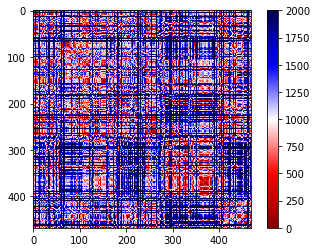

In [123]:
plt.figure()
plt.imshow(squareform(pdist(naive_spots[:,1:4]*_distance_zxy[np.newaxis,:])), cmap='seismic_r', vmin=0, vmax=2000)
plt.colorbar()
plt.show()